In [1]:
import random

# Simple Subsitution Cipher 

In [2]:
msg = "the nuclear codes are 5h1935k3c"

In [3]:
def CipherAlgo(msg):
    encrypted_msg = ''
    num = 5 #the ammount of characters to shift
    letters = 'abcdefghijklmnopqrstuvwxyz0123456789 '
    for letter in msg:
        n = letters.index(letter)+num
        if n >= len(letters):
            n = n - len(letters)
        encrypted_msg = encrypted_msg + letters[n]
    return encrypted_msg

In [4]:
enc_msg = CipherAlgo(msg)
enc_msg

'ymjeszhqjfwehtijxefwje m6d8 p8h'

In [5]:
def DecryptAlgo(msg):
    decrypted_msg = ''
    num = 5
    letters = 'abcdefghijklmnopqrstuvwxyz0123456789 '
    for lt in msg:
        n = letters.index(lt)-num
        decrypted_msg = decrypted_msg + letters[n]
    return decrypted_msg

In [6]:
DecryptAlgo(enc_msg), msg

('the nuclear codes are 5h1935k3c', 'the nuclear codes are 5h1935k3c')

We can add some randomness

the subsitution can be done using a randomized set of characters

In [7]:
def RandomLetters():
    letters = 'abcdefghijklmnopqrstuvwxyz0123456789 '
    new_letters = list(letters)
    random.shuffle(new_letters)
    return "".join(new_letters)

In [8]:
rnd_letters = RandomLetters()
rnd_letters

'3 fmzuoaclhs205498tqe17ywrxipjd6gbkvn'

In [9]:
def CipherAlgoRnd(msg,rnd_letters):
    encrypted_msg = ''
    num = 5
    letters = rnd_letters
    for lt in msg:
        n = letters.index(lt)+num
        if n >= len(letters):
            n = n - len(letters)
        encrypted_msg = encrypted_msg + letters[n]
    return encrypted_msg

In [10]:
def DecryptAlgoRnd(msg,rnd_letters):
    decrypted_msg = ''
    num = 5
    letters = rnd_letters
    for lt in msg:
        n = letters.index(lt)-num
        decrypted_msg = decrypted_msg + letters[n]
    return decrypted_msg

In [11]:
msg

'the nuclear codes are 5h1935k3c'

In [12]:
enc_msg = CipherAlgoRnd(msg,rnd_letters)
enc_msg

'y4rozh05r2do0svr9o2droq4x1uqfu0'

In [13]:
DecryptAlgoRnd(enc_msg,rnd_letters) , msg

('the nuclear codes are 5h1935k3c', 'the nuclear codes are 5h1935k3c')

How do we send the random letters over to decrypt.
One way is that we could just send the random letters altogeather using a simple substitue cipher.

In [15]:
msg = rnd_letters
msg

'3 fmzuoaclhs205498tqe17ywrxipjd6gbkvn'

In [16]:
enc_msg = CipherAlgo(msg)
enc_msg

'8ekr4ztfhqmx75 9dcyvj6b31w2nuoialgp0s'

In [18]:
DecryptAlgo(enc_msg), msg

('3 fmzuoaclhs205498tqe17ywrxipjd6gbkvn',
 '3 fmzuoaclhs205498tqe17ywrxipjd6gbkvn')

In [19]:
rnd_letters = DecryptAlgo(enc_msg)

In [20]:
msg = "thank you for the random letters"

In [21]:
enc_msg = CipherAlgoRnd(msg,rnd_letters)
enc_msg

'y42zfopshoasdoy4rod2zvsco5ryyrd9'

In [23]:
DecryptAlgoRnd(enc_msg,rnd_letters)

'thank you for the random letters'

# Trying to break MyCipher

In [31]:
msg = "thank you for the random letters"

In [32]:
enc_msg = CipherAlgoRnd(msg,rnd_letters)

In [74]:
enc_msg

'th2zf psh asd the d2zvsc 5etted9'

In [33]:
list_enc_msg = list(enc_msg)

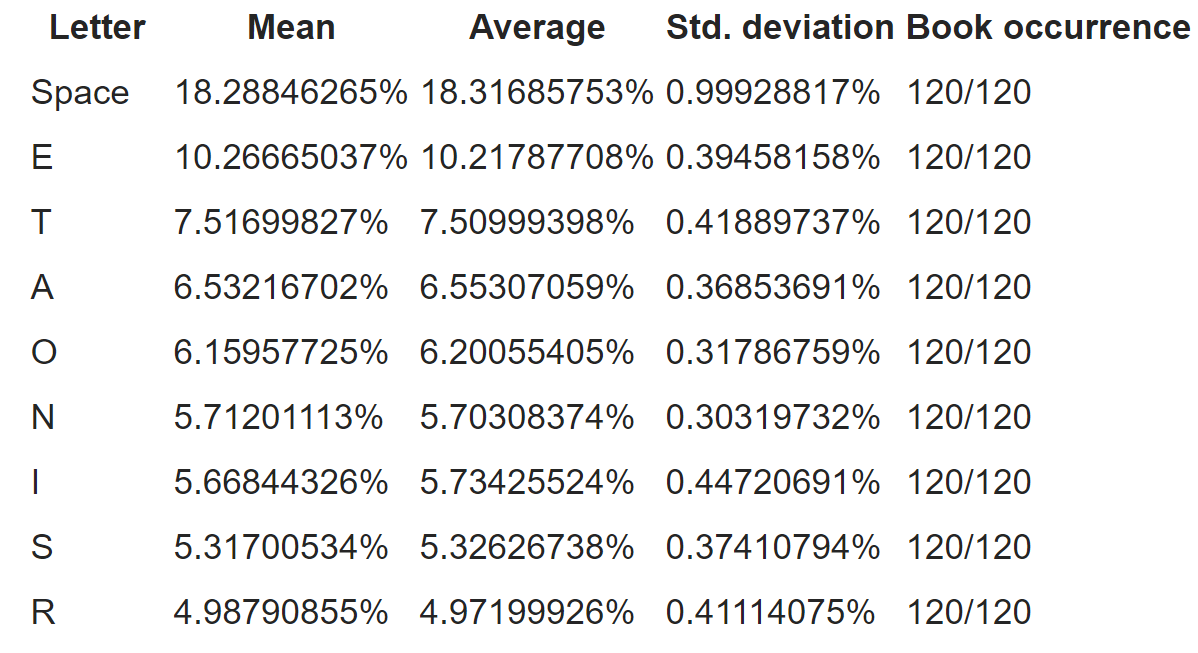
http://www.macfreek.nl/memory/Letter_Distribution#Letter_Frequency

We could use letter frequecies to break the cipher. In the english language the most common character is a space
https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/

In [68]:
from collections import Counter

In [69]:
occurence_count = Counter(list_enc_msg) 

In [70]:
occurence_count.most_common()

[('o', 5),
 ('y', 4),
 ('s', 3),
 ('d', 3),
 ('r', 3),
 ('4', 2),
 ('2', 2),
 ('z', 2),
 ('f', 1),
 ('p', 1),
 ('h', 1),
 ('a', 1),
 ('v', 1),
 ('c', 1),
 ('5', 1),
 ('9', 1)]

we could assume that 'o' represents a space.

In [71]:
enc_msg = enc_msg.replace('o',' ')
enc_msg

'y42zf psh asd y4r d2zvsc 5ryyrd9'

This now allows us to divide the sentence into words. The ammount of letters in a word can be used as valuable information in trying to decipher this message.

Again using the frequency we can estimate that 'y' maybe 'e'. However 'y' is used at the start of the word. The letter 'e' is a very uncommon letter at the start of the word.

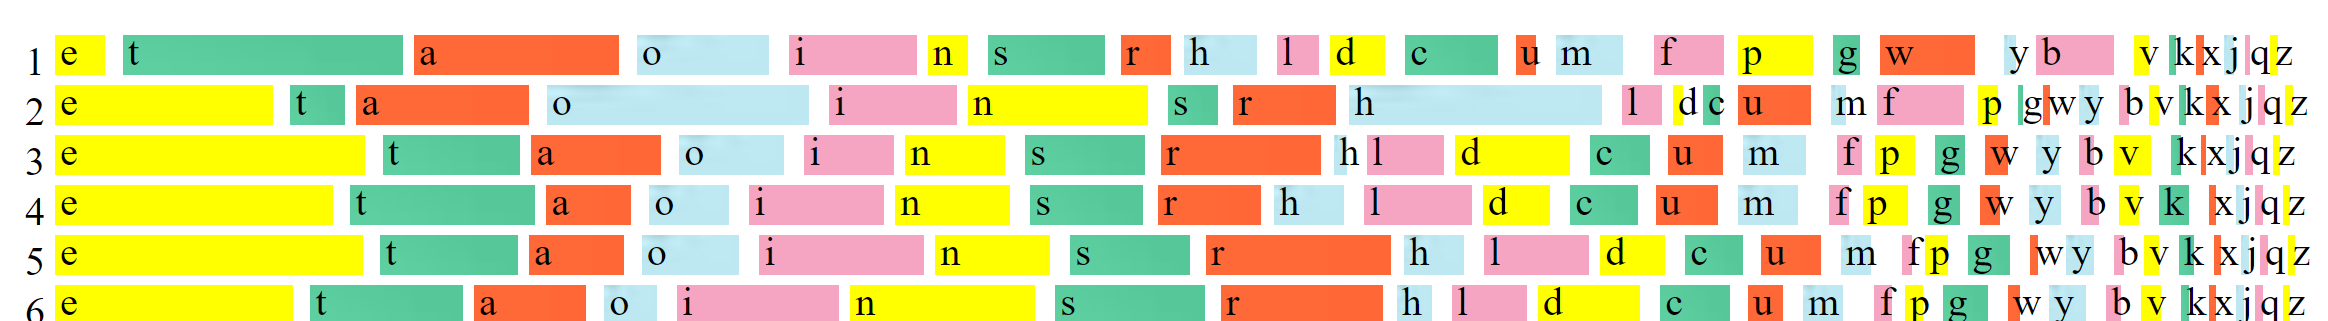
http://norvig.com/mayzner.html

The most common first letter is 't'. It is also a very common letter in general, placing third in the list of the most common letters.

Hence a better guess for 'y' would be the letter 't'

In [72]:
enc_msg = enc_msg.replace('y','t')
enc_msg

't42zf psh asd t4r d2zvsc 5rttrd9'

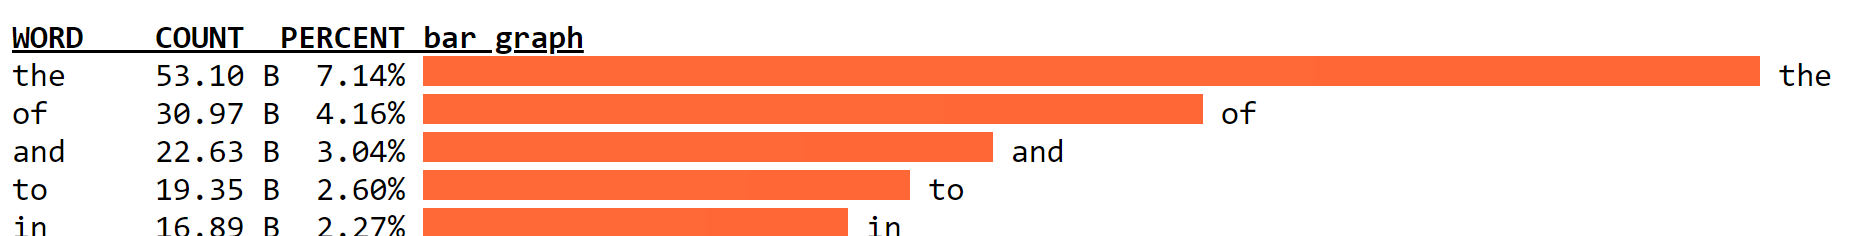

The most common three letter word is 'the'. Since we already have a word three letter word starting with 't' we would assume that it is 'the'.
This would mean that the characters '4' and 'r' would be 'h' and 'e'.

In [73]:
enc_msg = enc_msg.replace('4','h')
enc_msg = enc_msg.replace('r','e')
enc_msg

'th2zf psh asd the d2zvsc 5etted9'

Now we know that the first word starts with 'th' and has 5 letters

In [75]:
all_words = open('english3.txt' , 'r').readlines()

In [93]:
possible_words = []
for word in all_words:
    if word[:2] == 'th'and len(word) == 5+1: #plus one because there is a endline character at the end
        possible_words.append(word)

In [94]:
possible_words[:5] , len(possible_words)

(['thack\n', 'thais\n', 'thale\n', 'thana\n', 'thane\n'], 68)

Another thing we know is that each letter can only represent another letter. So the letters in the first word(th2zf) don't repeat.

In [95]:
for word in possible_words:
    list_word = list(word)
    occurence_count = Counter(list_word) 
    if occurence_count.most_common()[0][1] > 1:
        possible_words.remove(word)

In [96]:
possible_words[:5] , len(possible_words)

(['thack\n', 'thais\n', 'thale\n', 'thane\n', 'thank\n'], 55)

We also know that the word doesn't contain the letter 'e'

In [102]:
for word in possible_words:
    if word.find('e') != -1:
        possible_words.remove(word)

In [103]:
possible_words[:5] , len(possible_words)

(['thack\n', 'thais\n', 'thane\n', 'thank\n', 'thars\n'], 39)

# Proper Encryption (RSA)

https://www.geeksforgeeks.org/rsa-algorithm-cryptography/

https://www.programiz.com/python-programming/examples/prime-number-intervals

In [28]:
def getNextPrime(a):
    lower = a
    upper = a*10
    for num in range(lower, upper + 1):
        if num > 1:
            for i in range(2, num):
                if (num % i) == 0:
                    break
            else:
                return num

https://www.programiz.com/python-programming/examples/lcm

In [29]:
def compute_lcm(x, y):

    # choose the greater number
    if x > y:
        greater = x
    else:
        greater = y

    while(True):
        if((greater % x == 0) and (greater % y == 0)):
            lcm = greater
            break
        greater += 1

    return lcm

https://gist.github.com/JonCooperWorks/5314103

https://gist.github.com/JekaDeka/c9b0f5da16625e3c7bd1033356354579

In [30]:

'''
Euclid's algorithm for determining the greatest common divisor
Use iteration to make it faster for larger integers
'''
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

'''
Euclid's extended algorithm for finding the multiplicative inverse of two numbers
'''
def multiplicative_inverse(a, b):
    """Returns a tuple (r, i, j) such that r = gcd(a, b) = ia + jb
    """
    # r = gcd(a,b) i = multiplicitive inverse of a mod b
    #      or      j = multiplicitive inverse of b mod a
    # Neg return values for i or j are made positive mod b or a respectively
    # Iterateive Version is faster and uses much less stack space
    x = 0
    y = 1
    lx = 1
    ly = 0
    oa = a  # Remember original a/b to remove
    ob = b  # negative values from return results
    while b != 0:
        q = a // b
        (a, b) = (b, a % b)
        (x, lx) = ((lx - (q * x)), x)
        (y, ly) = ((ly - (q * y)), y)
    if lx < 0:
        lx += ob  # If neg wrap modulo orignal b
    if ly < 0:
        ly += oa  # If neg wrap modulo orignal a
    # return a , lx, ly  # Return only positive values
    return lx

'''
Tests to see if a number is prime.
'''

def generate_keypair(p, q):
    if p == q:
        raise ValueError('p and q cannot be equal')
    #n = pq
    n = p * q

    #Phi is the totient of n
    phi = compute_lcm((p-1), (q-1))

    #Choose an integer e such that e and phi(n) are coprime
    e = random.randrange(1, phi)

    #Use Euclid's Algorithm to verify that e and phi(n) are comprime
    g = gcd(e, phi)
    while g != 1:
        e = random.randrange(1, phi)
        g = gcd(e, phi)

    #Use Extended Euclid's Algorithm to generate the private key
    d = multiplicative_inverse(e, phi)
    
    #Return public and private keypair
    #Public key is (e, n) and private key is (d, n)
    return ((e, n), (d, n))

def encrypt(pk, plaintext):
    #Unpack the key into it's components
    key, n = pk
    #Convert each letter in the plaintext to numbers based on the character using a^b mod m
    cipher = [pow(ord(char) , key,n) for char in plaintext]
    #Return the array of bytes
    return cipher

def decrypt(pk, ciphertext):
    #Unpack the key into its components
    key, n = pk
    #Generate the plaintext based on the ciphertext and key using a^b mod m
    plain = [chr(pow(char, key,n)) for char in ciphertext]
    #Return the array of bytes as a string
    return ''.join(plain)
    

In [31]:
p = getNextPrime(random.randint(10000,100000))

In [32]:
q = getNextPrime(random.randint(100,10000))

In [33]:
public, private = generate_keypair(p, q)

In [34]:
private , public

((1492489, 51384071), (1331269, 51384071))

In [35]:
msg = 'the nuclear codes are eb287edh32'

In [36]:
encrypted_msg = encrypt(public,msg)

In [37]:
decrypt(private,encrypted_msg)

'the nuclear codes are eb287edh32'